In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [4]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 <a list of 11 Text major ticklabel objects>)

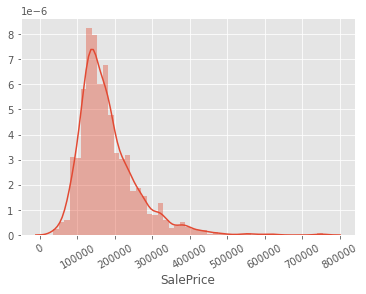

In [5]:
import seaborn as sns
sns.distplot(train['SalePrice'])
plt.xticks(rotation=30)

In [6]:
print('Skewness = ',train['SalePrice'].skew())

Skewness =  1.8828757597682129


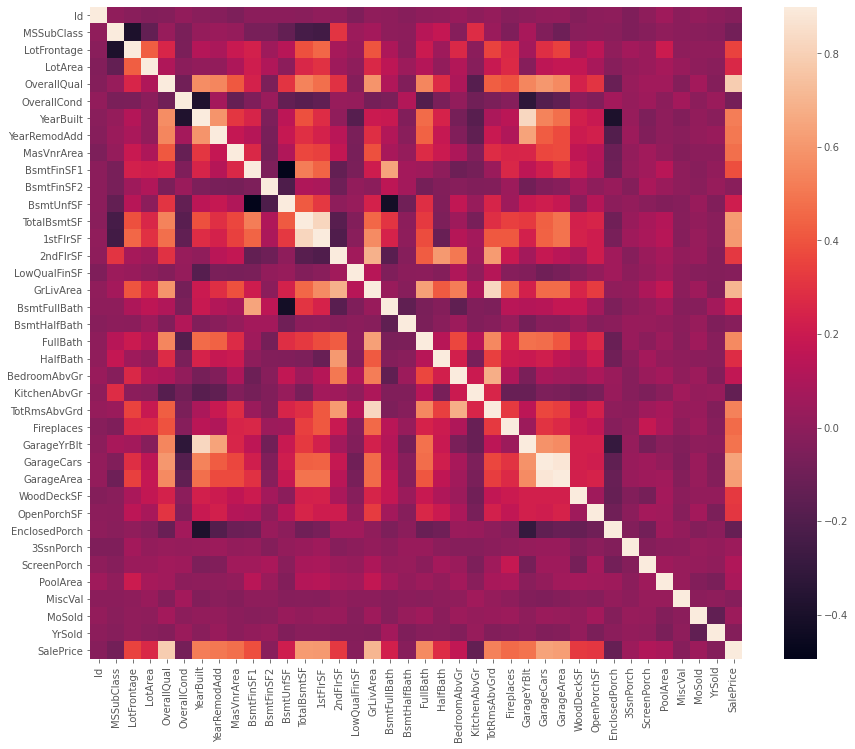

In [7]:
# correlation
corr = train.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,vmax=0.9,square=True)
plt.show();

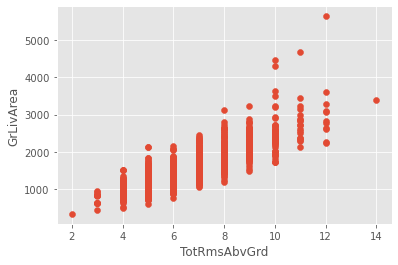

In [8]:
plt.scatter(x=train['TotRmsAbvGrd'], y=train['GrLivArea'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('GrLivArea')
plt.show();


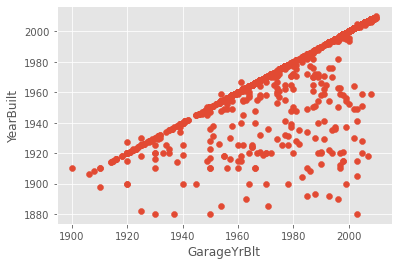

In [9]:
# GarageYrBlt and YearBuilt
plt.scatter(x=train['GarageYrBlt'], y=train['YearBuilt'])
plt.xlabel('GarageYrBlt')
plt.ylabel('YearBuilt')
plt.show();


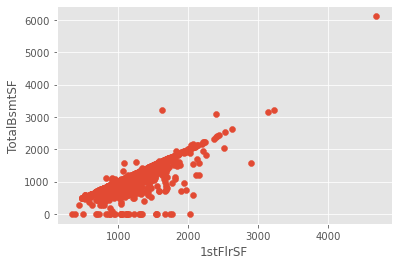

In [10]:
# 1stFlrSF and TotalBsmtSF
plt.scatter(x=train['1stFlrSF'], y=train['TotalBsmtSF'])
plt.xlabel('1stFlrSF')
plt.ylabel('TotalBsmtSF')
plt.show();


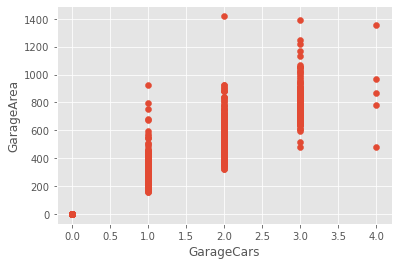

In [11]:
plt.scatter(x=train['GarageCars'], y=train['GarageArea'])
plt.xlabel('GarageCars')
plt.ylabel('GarageArea')
plt.show();

In [12]:
# correlation
corr = train.corr()
# sort in descending order
corr_top = corr['SalePrice'].sort_values(ascending=False)[:10]
top_features = corr_top.index[1:]
corr_top


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

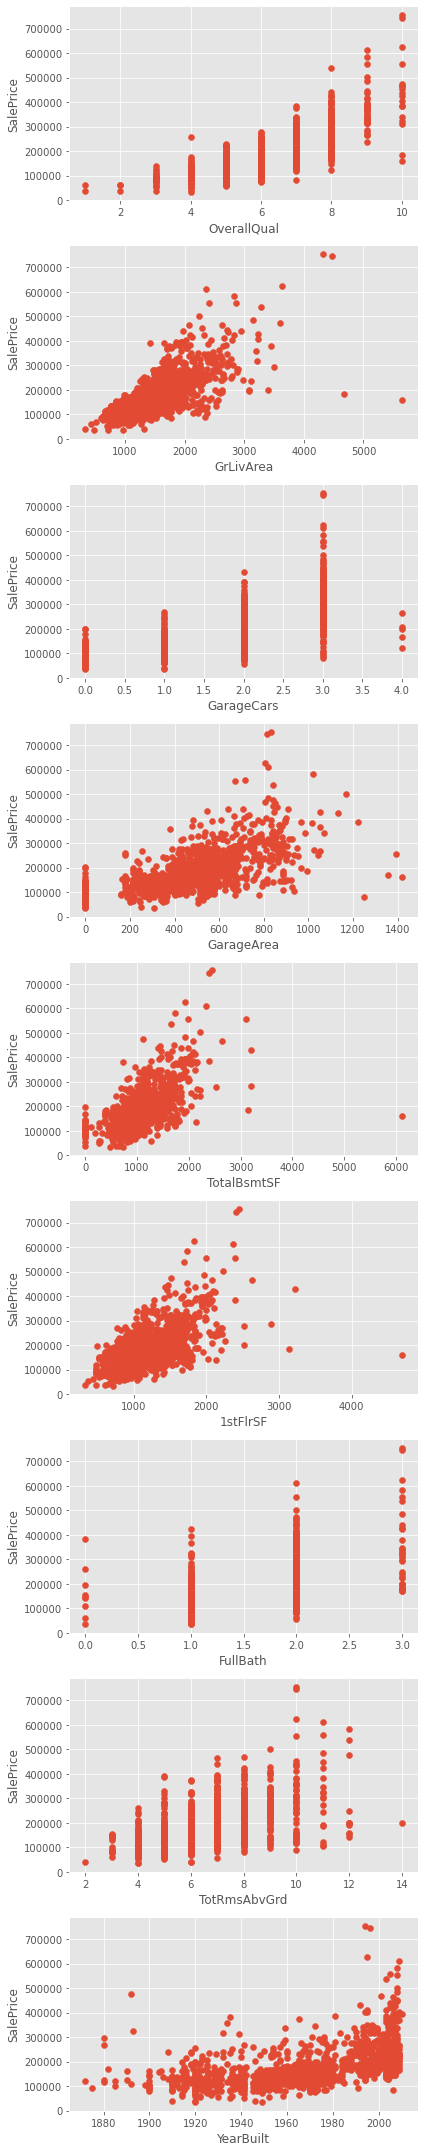

In [13]:
# Top features and SalePrice
numeric_cols = ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt']
nominal_cols = ['OverallQual','GarageCars','FullBath','TotRmsAbvGrd']
fig,ax=plt.subplots(nrows=9,ncols=1,figsize=(6,30))
for i in range(len(top_features)):
    
    ax[i].scatter(x=train[top_features[i]], y=train['SalePrice'])
    ax[i].set_xlabel('%s'%(top_features[i]))
    ax[i].set_ylabel('SalePrice')
plt.tight_layout()
plt.savefig('./Top_featuresvsSalePrice.jpg',dpi=300,bbox_inches='tight')
plt.show();

In [14]:
Q1 = []
Q3 = []
Lower_bound = []
Upper_bound = []
Outliers = []
for i in top_features:
# 25th and 75th percentiles
    q1, q3 = np.percentile(train[i],25), np.percentile(train[i],75)
# Interquartile range
    iqr = q3 - q1
# Outlier cutoff
    cut_off = 1.5*iqr
# Lower and Upper bounds
    lower_bound = q1-cut_off
    upper_bound = q3+cut_off
# save outlier indexes
    outlier = [x for x in train.index if train.loc[x,i]<lower_bound or train.loc[x,i]>upper_bound]
# append values for DataFrame
    Q1.append(q1)
    Q3.append(q3)
    Lower_bound.append(lower_bound)
    Upper_bound.append(upper_bound)
    Outliers.append(len(outlier))
    try:
        train.drop(outlier,inplace=True,axis=0)
    except:
        continue
df_out = pd.DataFrame({'Column':top_features,'Q1':Q1,'Q3':Q3,'Lower bound':Lower_bound,'Upper_bound':Upper_bound,'No. of outliers':Outliers})
df_out.sort_values(by='No. of outliers',ascending=False)

,Column,Q1,Q3,Lower bound,Upper_bound,No. of outliers
4,TotalBsmtSF,792.75,1266.25,82.500,1976.500,58
1,GrLivArea,1131.00,1778.25,160.125,2749.125,31
3,GarageArea,325.25,576.00,-50.875,952.125,14
7,TotRmsAbvGrd,5.00,7.00,2.000,10.000,11
5,1stFlrSF,866.00,1343.50,149.750,2059.750,7
2,GarageCars,1.00,2.00,-0.500,3.500,5
8,YearBuilt,1954.00,2000.00,1885.000,2069.000,5
0,OverallQual,5.00,7.00,2.000,10.000,2
6,FullBath,1.00,2.00,-0.500,3.500,0


In [15]:
train.shape

(1327, 81)

In [16]:
#train rows
ntrain = train.shape[0]

#save log transform of target feature
target = np.log(train['SalePrice'])

#drop Id and SalePrice from train dataframe
train.drop(['Id','SalePrice'],inplace=True,axis=1)

#store test Id
test_id = test['Id']
#drop test Id
test.drop(['Id'],inplace=True,axis=1)

#concatenate train and test dataframes
train = pd.concat([train,test])




In [17]:
train.shape

(2786, 79)

In [18]:
#Null values
train.isna().sum().sort_values(ascending=False).head(20)

PoolQC          2780
MiscFeature     2688
Alley           2595
Fence           2234
FireplaceQu     1375
LotFrontage      464
GarageCond       147
GarageQual       147
GarageYrBlt      147
GarageFinish     147
GarageType       145
BsmtCond          45
BsmtExposure      45
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        22
MasVnrArea        21
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [19]:
train['PoolQC'].unique()

array([nan, 'Fa', 'Gd', 'Ex'], dtype=object)

In [20]:
# Ordinal features
#NA means no Pool
train['PoolQC'].replace(['Ex','Gd','TA','Fa',np.nan],[4,3,2,1,0],inplace=True)
# NA means no fence
train['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw',np.nan],[4,3,2,1,0],inplace=True)
# NA means no fireplace
train['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0],inplace=True)

# Nominal features
# NA means no miscellaneous feature
train['MiscFeature'].fillna('None',inplace=True)
# NA means no alley access
train['Alley'].fillna('None',inplace=True)
# Numerical features
# Replace null lotfrontage with average of the neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [21]:
# Ordinal features
for i in ['BsmtCond','BsmtQual']:
    train[i].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0],inplace=True)
train['BsmtExposure'].replace(['Gd','Av','Mn','No',np.nan],[4,3,2,1,0],inplace=True)
for i in ['BsmtFinType1','BsmtFinType2']:
    train[i].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf',np.nan],[6,5,4,3,2,1,0],inplace=True)
# Numerical features
for i in ['BsmtHalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    train[i].fillna(0,inplace=True)

In [22]:
#NA means no masonary work
train['MasVnrType'].fillna('None',inplace=True)
#If no masonary work, then area is 0
train['MasVnrArea'].fillna(0,inplace=True)
#Replace with the most common value
for i in ['MSZoning','Utilities']:
    train[i].fillna(train[i].mode()[0],inplace=True)
#"Assume typical unless deductions are warranted"
train['Functional'].fillna('Typ',inplace=True)
#Replace with others
train['SaleType'].fillna('Oth',inplace=True)

train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)
#Replace with 'Other' value
for i in ['Exterior1st','Exterior2nd']:
    train[i].fillna('Other',inplace=True)
#Replace with most common value
train['KitchenQual'].fillna(train['KitchenQual'].mode()[0],inplace=True)
#ordinal value
train['KitchenQual'].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace=True)

In [23]:
# Ordinal features
train['CentralAir'].replace(['N','Y'],[0,1],inplace=True)
# Nominal features
for i in ['HeatingQC','ExterCond','ExterQual']:
    train[i].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace=True)



In [24]:
# Total surface area of house
train['TotalSF'] = train.apply(lambda x: x['1stFlrSF'] + x['2ndFlrSF'] + x['TotalBsmtSF'], axis=1)
# Total number of bathrooms in the house
train['TotalBath'] = train.apply(lambda x: x['FullBath'] + 0.5*x['HalfBath'] + x['BsmtFullBath'] + 0.5*x['BsmtHalfBath'], axis=1)
# Total Porch area in the house
train['TotalPorch'] = train.apply(lambda x: x['OpenPorchSF'] + x['EnclosedPorch'] + x['3SsnPorch'] + x['ScreenPorch'], axis=1)
# New house or an old house
train['NewHouse'] = train.apply(lambda x: 1 if x['SaleCondition']=='Partial' else 0, axis=1)

In [25]:
train.drop("GarageYrBlt",axis=1,inplace=True)
train.drop("GarageCars",axis=1,inplace=True)
train.drop("GarageArea",axis=1,inplace=True)

In [26]:
# One-Hot encoding
train = pd.get_dummies(train,drop_first=True)
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,3,2,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,3,2,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,2,2,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,3,2,...,0,0,0,0,1,0,0,0,1,0


In [27]:
# train dataset
df = train.iloc[:ntrain,:]
# test dataset
test = train.iloc[ntrain:,:]

In [28]:
from sklearn.model_selection import train_test_split
X = df
y = target
# training and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [29]:
#Null values
train.isna().sum().sort_values(ascending=False).head(20)

SaleCondition_Partial    0
Neighborhood_MeadowV     0
Neighborhood_Gilbert     0
Neighborhood_Edwards     0
Neighborhood_Crawfor     0
Neighborhood_CollgCr     0
Neighborhood_ClearCr     0
Neighborhood_BrkSide     0
Neighborhood_BrDale      0
Neighborhood_Blueste     0
LandSlope_Sev            0
LandSlope_Mod            0
LotConfig_Inside         0
LotConfig_FR3            0
LotConfig_FR2            0
LotConfig_CulDSac        0
Utilities_NoSeWa         0
LandContour_Lvl          0
LandContour_Low          0
LandContour_HLS          0
dtype: int64

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)
rmse = np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))
print(rmse)

0.1120082828582772


In [31]:
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
lr.score(X_test,y_test)

0.8964889073298287

In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# different alpha values
alphas = [0.01, 0.1, 0.3, 1, 3, 5, 10, 15, 20]
for a in alphas:
    lr = Ridge(alpha=a)
    lr.fit(X_train,y_train)
    rmse = np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))
    print('For Alpha = ',a,', RMSE = ',rmse)

For Alpha =  0.01 , RMSE =  0.11174290120870352
For Alpha =  0.1 , RMSE =  0.11049509289916808
For Alpha =  0.3 , RMSE =  0.10978906755105962
For Alpha =  1 , RMSE =  0.10984392804023126
For Alpha =  3 , RMSE =  0.10976094299272113
For Alpha =  5 , RMSE =  0.10921105220927298
For Alpha =  10 , RMSE =  0.10803015843289014
For Alpha =  15 , RMSE =  0.10732793173797112
For Alpha =  20 , RMSE =  0.10693603210962105


In [34]:
lr.fit(X_train,y_train)

Ridge(alpha=20)

In [35]:
lr.score(X_test,y_test)

0.9056515553207294

In [36]:
model = Ridge(alpha=3)
model.fit(X_train,y_train)

Ridge(alpha=3)

In [37]:
log_pred = model.predict(test)
actual_pred = np.exp(log_pred)

In [38]:
actual_pred

array([111296.67212579, 256540.19401618, 177423.05635046, ...,
       166610.60044187, 119815.18587401, 220934.67825687])

In [39]:
data_dict = {'Id':test_id,'SalePrice':actual_pred}
submit = pd.DataFrame(data_dict)
submit.to_csv('submission.csv',index=False)